# Week 6 - Linear Regression

Learning contents:

1. Linear models
    - Polynomial function
    - Radial basis function
    - Sigmoidal basis function
    - Optimization of Error function
    - Test models
2. Bayesian Linear Regression 
    - Generate data
    - Fit the data
    - Predictive distribution

## Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from scipy.stats import multivariate_normal

import seaborn as sns; sns.set(); sns.set_palette('bright')

## Generate Data

In [2]:
def target_func(x): return np.sin(2*np.pi*x)

def generate_data(size):
    rng = np.random.RandomState(26052605)
    x_train = rng.uniform(0., 1., size)
    y_train = target_func(x_train) + rng.normal(scale=0.1, size=size)
    x_test = np.linspace(0., 1., 100)
    y_test = target_func(x_test)
    
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = generate_data(10)

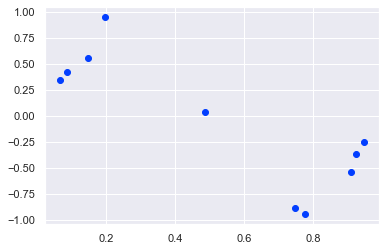

In [3]:
plt.scatter(x_train, y_train)

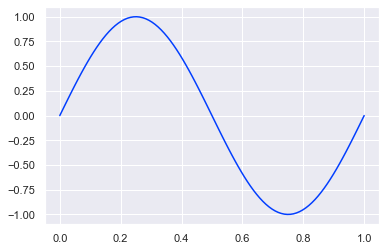

In [4]:
plt.plot(x_test, y_test, '-')

## 1) Linear models

`linear` takes data point `x` (scalar), `basis` function, and `weights` (list|ndarray (M+1)x1) and returns scalar

`basis` function takes `x` (scalar) and `i` (index) and returns `basis_i(x)` (scalar)

In [5]:
def linear(x, basis, weights):
    basis_vec = [basis(x,i) for i in range(1, len(weights))]
    basis_vec = [1] + basis_vec
    
    return weights.T @ np.array(basis_vec)

### 1.1) Polynomial basis function

`create_polynomial` returns function that takes `x` (scalar) and `i` (index) and returns the i-th value (scalar) of a polynomial basis function

In [6]:
def create_polynomial():
    def polynomial(x, i):
        return x**i
    
    return polynomial

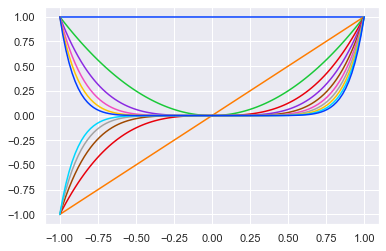

In [7]:
x = np.linspace(-1, 1, 100)
n = 11

polynomial = create_polynomial()

for i in range(n):
    y = list(map(lambda x: polynomial(x, i), x))
    plt.plot(x, y, '-')

### 1.2) Radial basis function

`create_radial` takes `means` and a `variance` as parameters and returns function that takes `x` (scalar) and `i` (index) and returns the i-th value (scalar) of a radial basis function

In [8]:
def create_radial(means, variance):
    def radial(x, i):
        return np.exp( (-(x-means[i])**2) / (2*variance) )
    
    return radial

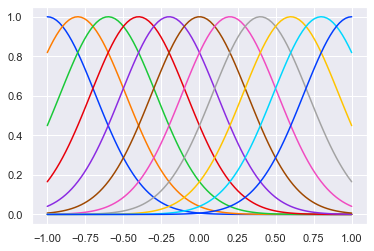

In [9]:
x = np.linspace(-1, 1, 100)
n = 11

radial = create_radial(np.linspace(-1, 1, 11), 0.1)

for i in range(n):
    y = list(map(lambda x: radial(x, i), x))
    plt.plot(x, y, '-')

### 1.3) Sigmoidal basis function

`create_sigmoidal` takes `means` and a coeficient `s` as parameters and returns function that takes `x` (scalar) and `i` (index) and returns the i-th value (scalar) of a sigmoidal basis function

In [10]:
def create_sigmoidal(means, s):
    def sigmoidal(x, i):
        return 1 / (1+np.exp(-((x-means[i])/s)))
    
    return sigmoidal

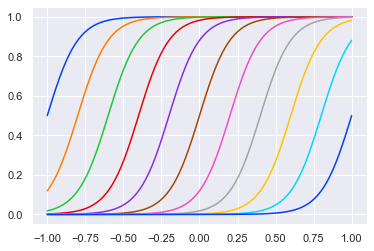

In [11]:
x = np.linspace(-1, 1, 100)
n = 11

sigmoidal = create_sigmoidal(np.linspace(-1, 1, 11), 0.1)

for i in range(n):
    y = list(map(lambda x: sigmoidal(x, i), x))
    plt.plot(x, y, '-')

### 1.4) Optimization of Error function

`optimial_weights` takes `basis` (linear function that takes `x` (scalar) and `i` (index)), `inputs` (list Nx1), `targets` (list Nx1), and `M` (scalar number of weights) as parameters and returns optimal weights (list|ndarray (M+1)x1) for this data and basis function

In [12]:
def optimial_weights(basis, inputs, targets, M):
    design = np.zeros((len(inputs), M))
    
    for n in range(len(inputs)):
        for j in range(M):
            if j == 0:
                design[n][j] = 1
            else: 
                design[n][j] = basis(inputs[n],j)
    print(design)
    
    optimal_weights = np.linalg.inv(design.T @ design) @ design.T @ targets 
                
    return optimal_weights

### 1.5) Test models

In [13]:
def test(basis, M, label=''):
    plt.plot(x_test, list(map(lambda x: linear(x, basis, optimial_weights(basis, x_train, y_train, M)), x_test)), '-', label=label)
    plt.plot(x_train, y_train, 'og')
    plt.legend()

[[1.00000000e+00 2.83518560e-02 1.44560559e-01 4.49833439e-01
  8.54254432e-01 9.90048192e-01 7.00259514e-01]
 [1.00000000e+00 2.38645604e-02 1.27258664e-01 4.14147334e-01
  8.22537998e-01 9.96989669e-01 7.37494755e-01]
 [1.00000000e+00 5.19555833e-07 1.77917481e-05 3.71825016e-04
  4.74233445e-03 3.69130000e-02 1.75347708e-01]
 [1.00000000e+00 5.69886748e-06 1.40721399e-04 2.12063204e-03
  1.95031195e-02 1.09465291e-01 3.74957787e-01]
 [1.00000000e+00 3.45992044e-07 1.24898462e-05 2.75157690e-04
  3.69947256e-03 3.03550921e-02 1.52004655e-01]
 [1.00000000e+00 3.34045438e-04 4.34169706e-03 3.44387262e-02
  1.66712525e-01 4.92518979e-01 8.87996593e-01]
 [1.00000000e+00 1.36268501e-02 8.35048861e-02 3.12292738e-01
  7.12763532e-01 9.92802008e-01 8.43943576e-01]
 [1.00000000e+00 8.55388161e-03 5.84409398e-02 2.43671500e-01
  6.20048801e-01 9.62898690e-01 9.12575719e-01]
 [1.00000000e+00 6.74855512e-07 2.23302244e-05 4.50929829e-04
  5.55723077e-03 4.17966513e-02 1.91848378e-01]
 [1.000000

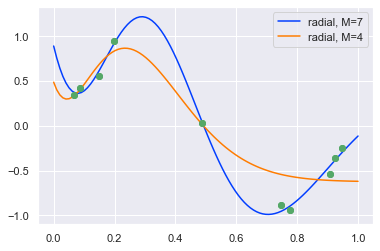

In [14]:
test(create_radial(np.linspace(-1, 1, 10), 0.1), 7, 'radial, M=7')
test(create_radial(np.linspace(-1, 1, 10), 0.1), 4, 'radial, M=4')

[[1.00000000e+00 6.63860434e-02 4.40710676e-03 2.92570381e-04
  1.94225900e-05 1.28938890e-06 8.55974278e-08]
 [1.00000000e+00 8.65555778e-02 7.49186805e-03 6.48462967e-04
  5.61280868e-05 4.85819898e-06 4.20504220e-07]
 [1.00000000e+00 9.23415424e-01 8.52696046e-01 7.87392681e-01
  7.27090547e-01 6.71406626e-01 6.19987235e-01]
 [1.00000000e+00 7.76264892e-01 6.02587182e-01 4.67767273e-01
  3.63111312e-01 2.81870563e-01 2.18806222e-01]
 [1.00000000e+00 9.47148311e-01 8.97089923e-01 8.49677205e-01
  8.04770330e-01 7.62236858e-01 7.21951353e-01]
 [1.00000000e+00 4.87467932e-01 2.37624985e-01 1.15834560e-01
  5.64656334e-02 2.75251856e-02 1.34176453e-02]
 [1.00000000e+00 1.49121694e-01 2.22372797e-02 3.31606083e-03
  4.94496610e-04 7.37401723e-05 1.09962594e-05]
 [1.00000000e+00 1.98067508e-01 3.92307377e-02 7.77033446e-03
  1.53905078e-03 3.04835954e-04 6.03780977e-05]
 [1.00000000e+00 9.07972336e-01 8.24413762e-01 7.48544889e-01
  6.79658052e-01 6.17110709e-01 5.60319451e-01]
 [1.000000

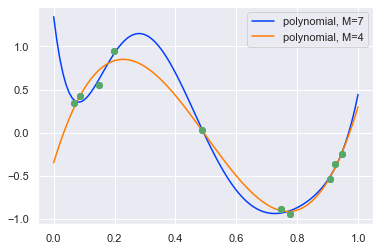

In [15]:
test(create_polynomial(), 7, 'polynomial, M=7')
test(create_polynomial(), 4, 'polynomial, M=4')

[[1.         0.48089154 0.44538669 0.41043065 0.37635639 0.343463
  0.31200619]
 [1.         0.48592833 0.45037425 0.41531989 0.3811021  0.3480254
  0.31635208]
 [1.         0.68580042 0.65423362 0.62124689 0.5870993  0.55209271
  0.51656208]
 [1.         0.65326176 0.62023613 0.58605814 0.55103078 0.51548984
  0.47979152]
 [1.         0.69089165 0.65958245 0.62681493 0.59284034 0.55795401
  0.52248619]
 [1.         0.5853101  0.55026802 0.51471987 0.47902216 0.44353741
  0.40861957]
 [1.         0.50156613 0.46590485 0.43058869 0.39596487 0.36235345
  0.33003624]
 [1.         0.51379909 0.47810232 0.44262782 0.40772912 0.37373697
  0.34094735]
 [1.         0.68246327 0.65073193 0.6176064  0.58335072 0.54827084
  0.51270463]
 [1.         0.64679183 0.61351455 0.5791421  0.54398488 0.5083838
  0.47269748]]
[[1.         0.48089154 0.44538669 0.41043065 0.37635639 0.343463
  0.31200619]
 [1.         0.48592833 0.45037425 0.41531989 0.3811021  0.3480254
  0.31635208]
 [1.         0.6858004

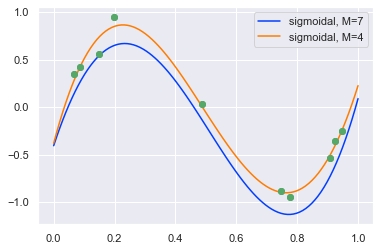

In [16]:
test(create_sigmoidal(np.linspace(0, 1, 8), 1), 7, 'sigmoidal, M=7')
test(create_sigmoidal(np.linspace(0, 1, 8), 1), 4, 'sigmoidal, M=4')

## 2) Bayesian Linear Regression 

### 2.1) Generate data

In [17]:
def line_func(x): return -0.5 + 0.3 * x

def generate_line_data(size):
    rng = np.random.RandomState(26052605)
    x_train = rng.uniform(0., 1., size)
    y_train = line_func(x_train) + rng.normal(scale=0.05, size=size)
    x_test = np.linspace(0., 1., 100)
    y_test = line_func(x_test)
    
    return x_train, y_train, x_test, y_test

xl_train, yl_train, xl_test, yl_test = generate_line_data(25)

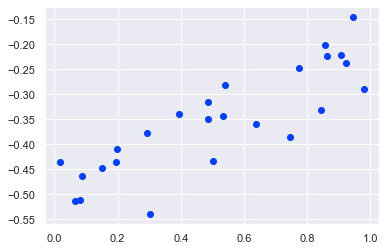

In [18]:
plt.scatter(xl_train, yl_train)

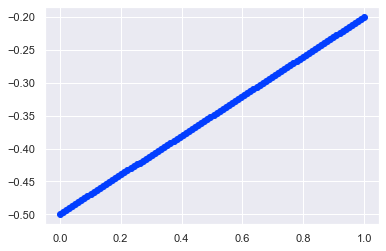

In [19]:
plt.scatter(xl_test, yl_test)

### 2.2) Fit the data

`bayessian_regression_fit` takes `PHI` (ndarray Nx(M+1)), `t` (ndarray Nx1 targets), `alpha` (scalar) and `beta` (scalar) as parameters and must return `mean` (ndarray Mx1) , and `covariance` (ndarray MxM) for the weights

In [20]:
def bayessian_regression_fit(PHI, t, alpha, beta):
    if (len(PHI) == 0):
        S_inv = alpha * np.eye(2) + (beta * PHI.T) @ PHI
    else: 
        S_inv = alpha * np.eye(len(PHI[0])) + (beta * PHI.T) @ PHI

    S = np.linalg.inv(S_inv)
    mean = beta * S @ PHI.T @ t
    
    return mean, S 

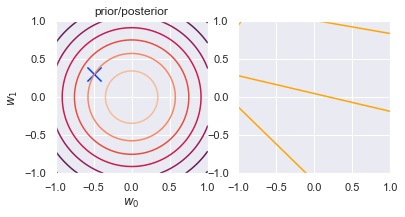

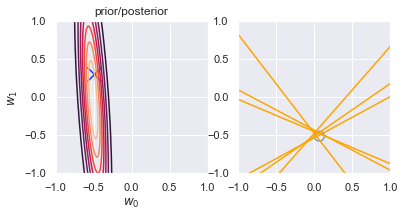

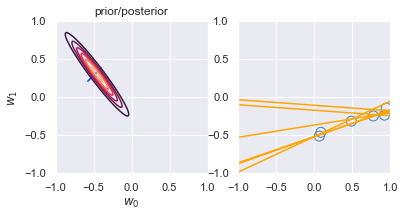

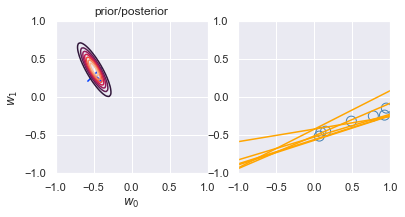

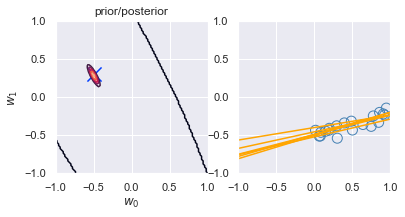

In [21]:
alpha = 1
beta = 100

x = np.linspace(-1, 1, 100)
w0, w1 = np.meshgrid(
    np.linspace(-1, 1, 100),
    np.linspace(-1, 1, 100)
)
w = np.array([w0, w1]).transpose(1, 2, 0)

basis = create_polynomial()

M = 1

PHI = np.array([[basis(x[q], i) for q in range(len(x))] for i in range(M + 1)]).T
PHI_train = np.array([[basis(xl_train[q], i) for q in range(len(xl_train))] for i in range(M + 1)]).T

for begin, end in [[0, 0], [0, 1], [3, 6], [4, 7], [3, 20]]:
    
    w_mean, w_cov = bayessian_regression_fit(PHI_train[begin:end], yl_train[begin:end], alpha, beta)
    
    w_sample = np.random.multivariate_normal(
        w_mean.reshape(-1), w_cov, size=6
    )
    y_sample = PHI @ w_sample.T
    
    
    plt.subplot(1, 2, 1)
    plt.scatter(-0.5, 0.3, s=200, marker="x")
    plt.contour(w0, w1, multivariate_normal.pdf(w, mean=w_mean, cov=w_cov))
    plt.gca().set_aspect('equal')
    plt.xlabel("$w_0$")
    plt.ylabel("$w_1$")
    plt.title("prior/posterior")

    plt.subplot(1, 2, 2)
    plt.scatter(xl_train[:end], yl_train[:end], s=100, facecolor="none", edgecolor="steelblue", lw=1)
    plt.plot(x, y_sample, c="orange")
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

### 2.3) Predictive distribution

`sample` takes `PHI_train` (ndarray Nx(M+1)), `y_train` (ndarray Nx1), `alpha` (scalar), `beta` (scalar), and `PHI_test` as parameters and returns `y` (ndarray N_test x 1 prediction means) and `y_std` (ndarray N_test x 1 prediction deviations)

In [22]:
def sample(PHI_train, y_train, alpha, beta, PHI_test):
    mean, covariance =  bayessian_regression_fit(PHI_train, y_train, alpha, beta)
    N = len(PHI_test)
    
    y = [np.inner(mean, PHI_test[n]) for n in range(N)]
    
    y_std = [np.sqrt((1/beta) + PHI_test[n].T @ covariance @ PHI_test[n]) for n in range(N)]
    
    return np.array(y), np.array(y_std)

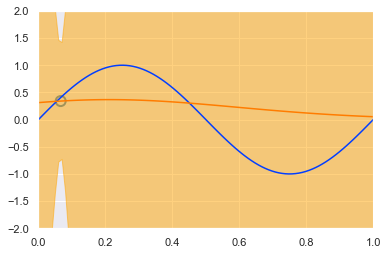

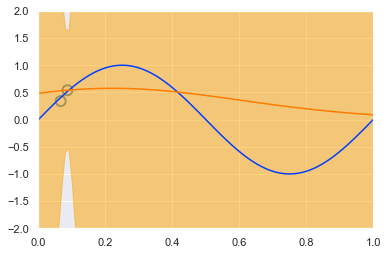

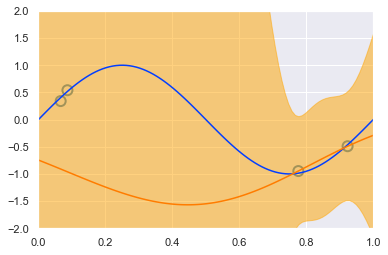

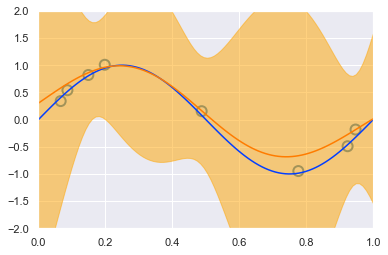

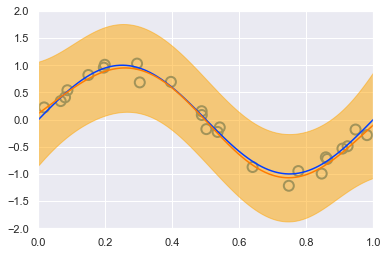

In [23]:
alpha = 1e-3
beta = 2
x_train, y_train, x_test, y_test = generate_data(25)

basis = create_radial(np.linspace(0, 1, 9), 0.1)

M = 8

PHI_train = np.array([[basis(x_train[q], i) for q in range(len(x_train))] for i in range(M + 1)]).T
PHI_test = np.array([[basis(x_test[q], i) for q in range(len(x_test))] for i in range(M + 1)]).T

for begin, end in [[0, 1], [1, 2], [2, 4], [4, 8], [8, 25]]:
    
    y, y_std = sample(PHI_train[begin:end], y_train[begin:end], alpha, beta, PHI_test)
    
    plt.scatter(x_train[:end], y_train[:end], s=100, facecolor="none", edgecolor="steelblue", lw=2)
    plt.plot(x_test, y_test)
    plt.plot(x_test, y)
    plt.fill_between(x_test, y - y_std, y + y_std, color="orange", alpha=0.5)
    plt.xlim(0, 1)
    plt.ylim(-2, 2)
    plt.show()